In [ ]:
# from google.colab import drive
# drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [ ]:
# %cd /content/MyDrive/MyDrive/ICG Comp


/content/MyDrive/MyDrive/ICG Comp


In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.datasets.mnist import load_data

In [ ]:
(x_train, y_train), (x_test, y_test) = load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print("x_train.shape is",x_train.shape)
print("x_test.shape is",x_test.shape)
print("y_train.shape is",x_train.shape)
print("y_test.shape is",y_test.shape)

x_train.shape is (60000, 28, 28)
x_test.shape is (10000, 28, 28)
y_train.shape is (60000, 28, 28)
y_test.shape is (10000,)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate

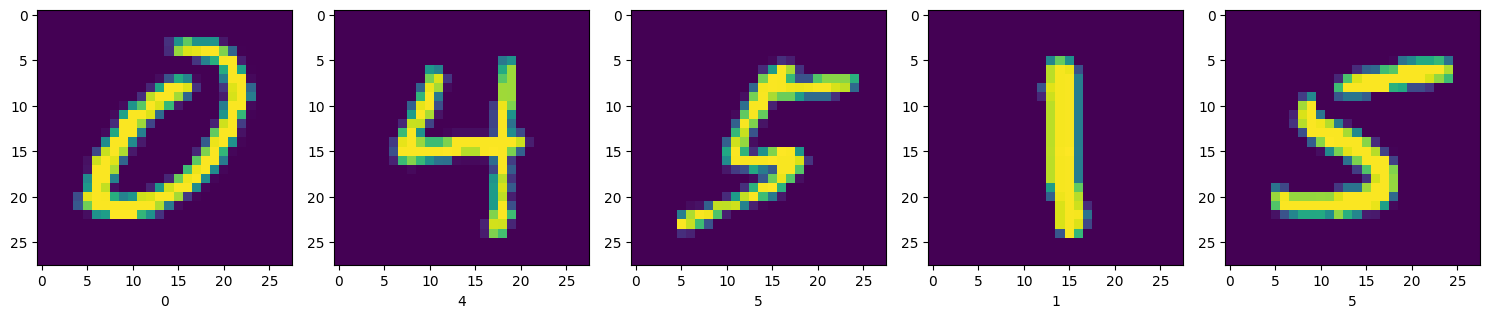

In [ ]:
idc = np.random.randint(0,60000,size = 5)
plt.figure(figsize = (15,15))

for i in range(5):
  plt.subplot(1,5,i+1)
  j = idc[i]
  plt.imshow(x_train[j])
  plt.xlabel(y_train[j])
  plt.tight_layout()

In [ ]:
one_inc = np.array(np.where(y_train == 1)[0])
zero_inc = np.array(np.where(y_train == 0)[0])

one_inc

array([    3,     6,     8, ..., 59979, 59984, 59994])

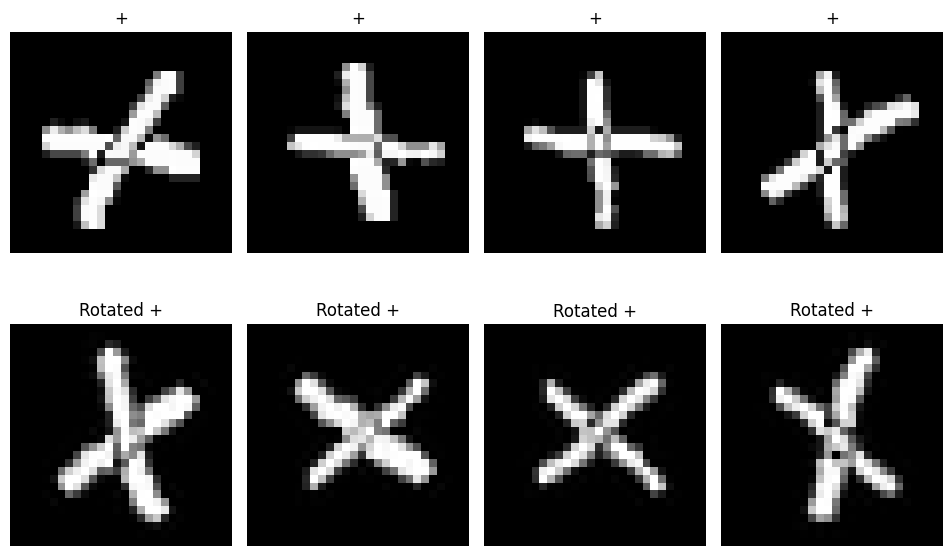

In [ ]:
plt.figure(figsize = (12,6))
for i in range(4):
    j = one_inc[i]
    k = one_inc[i + 1]

    # Create an image by adding two original images
    img = x_train[j] + x_train[k].T

    # Plot the original image addition
    plt.subplot(2, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title('+')
    plt.axis('off')

    # Rotate the combined image by 45 degrees
    rotated_img = rotate(img, 45, reshape=False, mode='constant', cval=0)

    # Plot the rotated image addition
    plt.subplot(2, 5, i + 6)  # Use the next row of subplots
    plt.imshow(rotated_img, cmap='gray')
    plt.title('Rotated +')
    plt.axis('off')

plt.tight_layout()
plt.show()

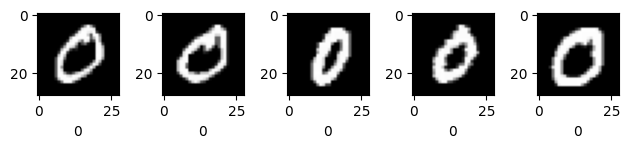

In [ ]:
for i in range(5):
  plt.subplot(1,5,i+1)
  j = zero_inc[i]
  plt.imshow(x_train[j], cmap = 'gray')
  plt.xlabel(y_train[j])
  plt.tight_layout()

In [ ]:
len(one_inc)

6742

In [ ]:
len(zero_inc)

5923

In [ ]:
len(np.where(y_test == 1)[0])

1135

In [ ]:
len(np.where(y_test == 0)[0])

980

In [ ]:
zeros = x_train[zero_inc] ##

In [ ]:
import random

def select_random_pairs(m, n):
    if m > n * (n - 1) / 2:
        raise ValueError("Cannot select more pairs than available.")

    pairs = set()
    while len(pairs) < m:
        pair = (random.randint(0, n-1), random.randint(0, n-1))
        if pair[0] != pair[1] and pair not in pairs:
            pairs.add(pair)
    return list(pairs)


In [ ]:
m = 1000  # Number of random pairs
n = 6742  # Range of integers from 0 to n-1
random_pairs = select_random_pairs(m, n)
print(random_pairs)

[(4681, 1458), (856, 1302), (231, 5414), (2853, 2094), (5652, 871), (3232, 6328), (4896, 2285), (1226, 17), (6194, 2322), (3265, 4933), (4934, 5960), (3387, 2415), (2570, 1927), (3087, 1628), (5385, 1631), (634, 6679), (6531, 5512), (1825, 1406), (3052, 2317), (4878, 6415), (1733, 2571), (482, 3023), (330, 1434), (748, 6148), (5282, 2334), (1488, 5921), (6302, 966), (5634, 278), (5498, 4847), (856, 6095), (3227, 6640), (6465, 3589), (208, 2612), (1786, 1306), (5839, 3275), (4536, 4062), (6542, 3139), (2619, 462), (5578, 5836), (4089, 983), (4949, 1878), (3005, 1400), (582, 2156), (3312, 3543), (4998, 3985), (4177, 574), (3158, 595), (1017, 2269), (4267, 1965), (6349, 1404), (467, 6003), (5635, 1014), (5770, 2636), (116, 1989), (5923, 1417), (1478, 5983), (3171, 3395), (3007, 4492), (4514, 2946), (4958, 3660), (2263, 2237), (3192, 3454), (3076, 1064), (4237, 5297), (6675, 648), (2435, 6666), (2423, 5114), (3808, 461), (5898, 5157), (5717, 5082), (3404, 1280), (2093, 220), (3409, 1129), 

In [ ]:
# for i,j in random_pairs:
#   print(f"({i},{j})")

In [ ]:
ones = []

for i,j  in random_pairs:
  img = x_train[one_inc[i]]+x_train[one_inc[j]].T
  rotated_img = rotate(img, 45, reshape=False, mode='constant', cval=0)
  ones.append(rotated_img)


In [ ]:
ones = np.array(ones)

In [ ]:
print(zeros.shape,ones.shape)

(6000, 28, 28) (6000, 28, 28)


In [ ]:
zeros = list(zeros)

In [ ]:
indices = np.where(y_test == 0)[0]
i=0
while len(zeros) < 1000:
  zeros.append(x_test[indices[i]])
  i += 1

In [ ]:
zeros = np.array(zeros)

In [ ]:
zeros.shape

(6000, 28, 28)

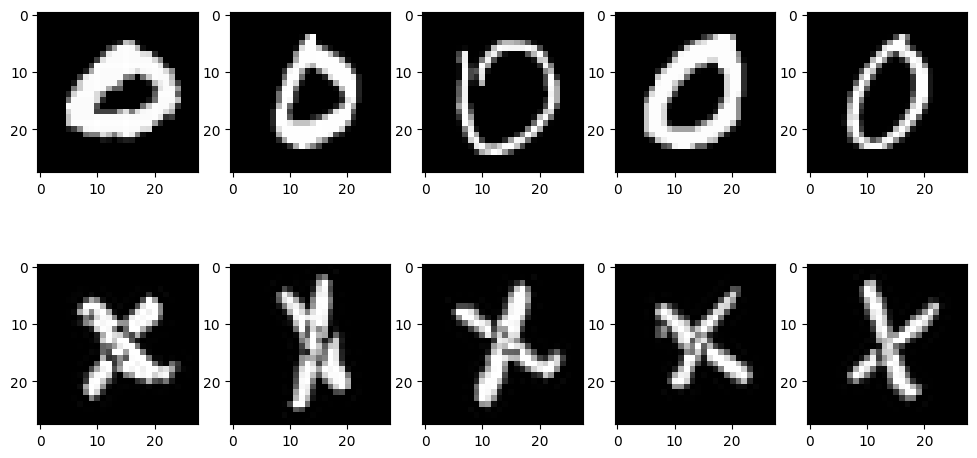

In [ ]:
plt.figure(figsize = (12,6))

ind = np.random.randint(6000,size = 5)
for j in range(5):
  i = ind[j]
  plt.subplot(2,5,j+1)
  plt.imshow(zeros[i], cmap = 'gray')
  plt.subplot(2,5,j+6)
  plt.imshow(ones[i], cmap = 'gray')

In [ ]:
!ls

ones  zeros


In [ ]:
import cv2

In [ ]:
for i in range(6000):
  cv2.imwrite(f'Images/ones/{i}.png',ones[i])
  cv2.imwrite(f'Images/zeros/{i}.png',zeros[i])